# A. Enfoque de validación
##ACA ESTAN LAS BASES DE DATOS Y UNA MUESTRA DE QUE ESTAN BIEN

In [21]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [22]:
norespondieron = pd.read_excel("norespondieron.xlsx")
respondieron = pd.read_excel("respondieron.xlsx")
print(norespondieron.shape)
print(respondieron.shape)
print(norespondieron.columns.tolist())
print(respondieron.columns.tolist())

(2985, 23)
(12866, 26)
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'PP10A', 'PP03J', 'PP04A', 'P21', 'P47T', 'ITF', 'IPCF', 'adulto_equiv']
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'PP10A', 'PP03J', 'PP04A', 'P21', 'P47T', 'ITF', 'IPCF', 'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario', 'pobre']


In [23]:
# Obtener los tipos de datos de cada df
tipos_no = norespondieron.dtypes.rename("norespondieron")
tipos_re = respondieron.dtypes.rename("respondieron")

# Unirlos en un solo DataFrame
comparacion_tipos = pd.concat([tipos_no, tipos_re], axis=1)

# Mostrar el cuadro resultante
print(comparacion_tipos)

                  norespondieron respondieron
CODUSU                    object       object
NRO_HOGAR                  int64        int64
COMPONENTE                 int64        int64
REGION                     int64        int64
ANO4                       int64        int64
CH04                       int64        int64
CH06                       int64        int64
CH07                       int64        int64
CH08                       int64        int64
CH12                       int64        int64
CH13                       int64        int64
CH14                       int64        int64
NIVEL_ED                   int64        int64
ESTADO                     int64        int64
CAT_INAC                   int64        int64
PP10A                      int64        int64
PP03J                      int64        int64
PP04A                      int64        int64
P21                        int64        int64
P47T                       int64        int64
ITF                        int64  

In [24]:
# creamos las variables a usar, la variables dependiente y variables independientes
variables_X = ['ANO4', 'CH04','CH06','CH07','CH08','NIVEL_ED','CAT_INAC', 'ESTADO']
variable_y = 'pobre'

# Crear X e y
X = respondieron[variables_X].copy()
y = respondieron[variable_y]

# Agregar columna de unos para el intercepto
X.insert(0, 'const', 1)

In [25]:
# Separar en train y test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

### Ejercicio 1

In [26]:
# creamos las variables a usar, la variables dependiente y variables independientes
variables_X = ['ANO4', 'CH04','CH06','CH07','CH08','NIVEL_ED','CAT_INAC', 'ESTADO']
variable_y = 'pobre'

# Crear X e y
X = respondieron[variables_X].copy()
y = respondieron[variable_y]

# Agregar columna de unos para el intercepto
X.insert(0, 'const', 1)

# Separar en train y test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

In [27]:
# Calcular medias en train y test
media_train = X_train.mean()
media_test = X_test.mean()

In [28]:
# Calcular diferencia de medias
diferencias = media_train - media_test

In [29]:
# Crear tabla resumen
tabla_dif = pd.DataFrame({
    'Media_Train': media_train,
    'Media_Test': media_test,
    'Diferencia': diferencias
}).round(3)

print(tabla_dif)

          Media_Train  Media_Test  Diferencia
const           1.000       1.000       0.000
ANO4         2011.587    2011.352       0.234
CH04            1.527       1.520       0.007
CH06           35.880      36.033      -0.153
CH07            3.463       3.474      -0.011
CH08            2.311       2.300       0.011
NIVEL_ED        3.540       3.517       0.023
CAT_INAC        1.644       1.640       0.004
ESTADO          2.201       2.201      -0.000


### Ejercicio 2: separar por años

In [72]:
respondieron_2025 = respondieron[respondieron['ANO4'] == 2025].reset_index(drop=True)
respondieron_2005 = respondieron[respondieron['ANO4'] == 2005].reset_index(drop=True)

# Corrected filtering for norespondieron dataset
norespondieron_2025 = norespondieron[norespondieron['ANO4'] == 2025].reset_index(drop=True)
norespondieron_2005 = norespondieron[norespondieron['ANO4'] == 2005].reset_index(drop=True)

# B) Modelo de regresión logistica

### Ejercicio 3: estimación y efectos marginales

In [31]:
# Crear X e y de respondieron_2025
variables_X = ['CH04','CH06','CH07','CH08','NIVEL_ED','CAT_INAC', 'ESTADO'] # quitamos año respecto a la definicion anterior
variable_y = 'pobre'

X = respondieron_2025[variables_X].copy()
y = respondieron_2025[variable_y]


In [32]:
# Convertir las variables categóricas a tipo "category" y luego a dummies
# drop_first=True evita multicolinealidad eliminando la categoría base
X = pd.get_dummies(X, columns=['NIVEL_ED','CAT_INAC', 'ESTADO'], drop_first=True)
X= X.astype(float)

In [33]:
# Agregar columna de unos para el intercepto
X.insert(0, 'const', 1)

# Separar en train y test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

In [34]:
# Estimamos el modelo de regresion logistica
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# obtenemos los coeficientes, errores estandard y los odd ratios
coefficients = result.params
standard_errors = result.bse
odd_ratios = np.exp(coefficients)

# Creamos una tabla para ver los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error Estándar': standard_errors,
    'Odd Ratio': odd_ratios
})

print(results_table)

Optimization terminated successfully.
         Current function value: 0.496474
         Iterations 7
            Coeficiente  Error Estándar  Odd Ratio
const         -0.440340    3.217262e-01   0.643817
CH04           0.104810    9.489611e-02   1.110500
CH06          -0.021302    4.076088e-03   0.978923
CH07          -0.102714    3.725284e-02   0.902385
CH08           0.286905    2.333934e-02   1.332298
NIVEL_ED_2     0.277801    2.318519e-01   1.320223
NIVEL_ED_3    -0.122726    1.856327e-01   0.884506
NIVEL_ED_4    -0.347999    2.113986e-01   0.706100
NIVEL_ED_5    -1.155016    2.242692e-01   0.315053
NIVEL_ED_6    -1.608418    2.584352e-01   0.200204
NIVEL_ED_7    -0.175317    4.449437e-01   0.839191
CAT_INAC_1    -1.011259    9.911510e+06   0.363761
CAT_INAC_2    -1.847685    9.911510e+06   0.157602
CAT_INAC_3     0.350005    9.911510e+06   1.419074
CAT_INAC_4     0.563601    9.911510e+06   1.756987
CAT_INAC_5     0.085360    9.911510e+06   1.089109
CAT_INAC_6     1.047111    9.91

In [35]:
# Calculo los efectos marginales promedio
marginal_effects = result.get_margeff(at="overall", method="dydx")

# mostramos los efectos marginales
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:                  pobre
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CH04           0.0173      0.015      1.124      0.261      -0.013       0.048
CH06          -0.0035      0.001     -5.306      0.000      -0.005      -0.002
CH07          -0.0170      0.006     -2.754      0.006      -0.029      -0.005
CH08           0.0474      0.003     13.666      0.000       0.041       0.054
NIVEL_ED_2     0.0459      0.038      1.197      0.231      -0.029       0.121
NIVEL_ED_3    -0.0203      0.031     -0.662      0.508      -0.080       0.040
NIVEL_ED_4    -0.0575      0.035     -1.654      0.098      -0.126       0.011
NIVEL_ED_5    -0.1908      0.036     -5.277      0.000      -0.262      -0.120
NIVEL_ED_6    -0.2657      0.041     -6.413      0.000    

### Ejercicio 4: visualización

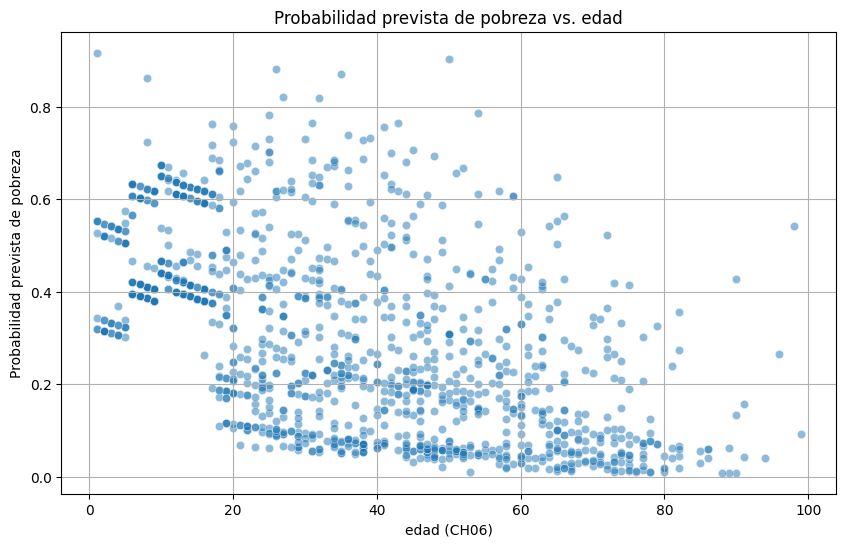

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predecimos las probabilidades
predicted_probabilities = result.predict(X_test)

# Creamos un DataFrame para graficar
plot_data = pd.DataFrame({
    'edad': X_test['CH06'],
    'Probabilidad_prevista_pobreza': predicted_probabilities
})

# Creamos el diagrama de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad', y='Probabilidad_prevista_pobreza', data=plot_data, alpha=0.5)
plt.title('Probabilidad prevista de pobreza vs. edad')
plt.xlabel('edad (CH06)')
plt.ylabel('Probabilidad prevista de pobreza')
plt.grid(True)
plt.show()

# C. Método de Vecinos Cercanos (KNN)

### Ejercicio 5: Estimación

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definimos los valores de k a utilizar
k_values = [1, 5, 10]

# Iteramos a través de los diferentes valores de K
for k in k_values:
    # Iniciamos el clasificador knn
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Ajustamos los datos al training
    knn_model.fit(X_train, y_train)

    # Predicción basada en los datos de entrenamiento (a modo de demostración)
    y_train_pred = knn_model.predict(X_train)

    print(f"KNN modelo con K={k} instalado.")

    # Calculamos la precisión en los datos de entrenamiento
    #Aca se  puede agregar código para evaluar el modelo en el conjunto de prueba si es necesario.
    #Por ejemplo:
    # accuracy = accuracy_score(y_test, y_test_pred)
    # print(f"Accuracy for K={k}: {accuracy:.4f}")

KNN modelo con K=1 instalado.
KNN modelo con K=5 instalado.
KNN modelo con K=10 instalado.


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# iteramos a traves de los distintos valores de k
for k in k_values:
    print(f"\n--- Resultados para K = {k} ---")
    # Iniciamos el clasificador KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Ajustar el modelo a los datos de entrenamiento
    knn_model.fit(X_train, y_train)

    # Predicción basada en los datos de prueba
    y_test_pred = knn_model.predict(X_test)

    # Mostramos informe de clasificación
    print("reporte de clasificación:")
    print(classification_report(y_test, y_test_pred))

    # Mostramos matriz de confusión
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))


--- Resultados para K = 1 ---
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       841
           1       0.53      0.48      0.50       417

    accuracy                           0.69      1258
   macro avg       0.64      0.63      0.64      1258
weighted avg       0.68      0.69      0.68      1258

Confusion Matrix:
[[661 180]
 [216 201]]

--- Resultados para K = 5 ---
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       841
           1       0.65      0.50      0.56       417

    accuracy                           0.74      1258
   macro avg       0.71      0.68      0.69      1258
weighted avg       0.73      0.74      0.73      1258

Confusion Matrix:
[[730 111]
 [210 207]]

--- Resultados para K = 10 ---
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.89    

### Ejercicio 6: Visualización ¡¡¡¡¡¡REVISAR!!!!
hay 2 codigos pero ambos estan raros


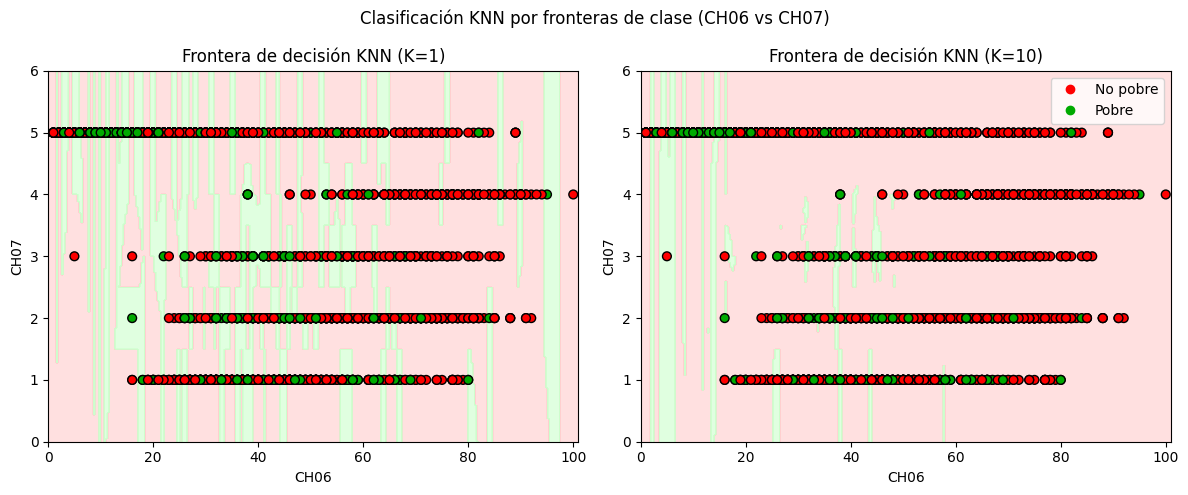

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Extraer solo las dos características CH06 y CH07
X = X_train[['CH06', 'CH07']].values
y = y_train.values  # Asegúrate de que y_train sea un vector (no un DataFrame)

# Definir los valores de K
k_values = [1, 10]

# Crear malla para la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Mapas de color
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC'])  # fondo
cmap_bold = ListedColormap(['#FF0000', '#00AA00'])   # puntos

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, k in zip(axes, k_values):
    # Entrenar KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Predicciones en la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar frontera
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Graficar puntos de entrenamiento
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)

    # Etiquetas
    ax.set_title(f'Frontera de decisión KNN (K={k})')
    ax.set_xlabel('CH06')
    ax.set_ylabel('CH07')

# Leyenda
plt.legend(handles=scatter.legend_elements()[0],
           labels=['No pobre', 'Pobre'], loc='upper right')

plt.suptitle('Clasificación KNN por fronteras de clase (CH06 vs CH07)')
plt.tight_layout()
plt.show()


### Ejercicio 7: K optimo por CV

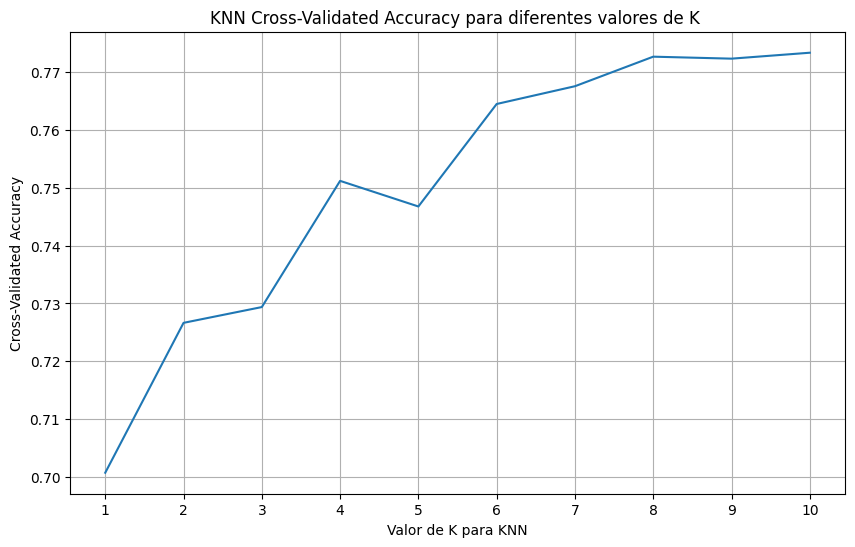

el numero optimo de vecinos (K) es: 10


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Definimos el rango de valores k a probar
k_range = range(1, 11)
k_scores = []

# Realizamos validación cruzada de 5-fold para cada K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Graficamos la precisión para cada K
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy para diferentes valores de K ')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

# Find the optimal K
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"el numero optimo de vecinos (K) es: {optimal_k}")

#D. Modelo de Regresion Logistica con Regularización: Ridg y LASSO

### Ejercicio 8: Visualización

In [41]:
# Definir la grilla de penalidades
n_values = np.arange(-5, 6)  # -5 a 5
lambdas = 10.0** n_values
C_values = 1 / lambdas  # inverso de lambda

# Listas para guardar coeficientes
coef_ridge = []
coef_lasso = []

# Columnas (sin la constante)
feature_names = [col for col in X_train.columns if col != 'const']

In [42]:
# Loop sobre penalidades
for C in C_values:
    # Ridge (L2)
    ridge = LogisticRegression(
        penalty='l2',
        C=C,
        solver='lbfgs',
        max_iter=1000
    )
    ridge.fit(X_train[feature_names], y_train)
    coef_ridge.append(ridge.coef_[0])

    # LASSO (L1)
    lasso = LogisticRegression(
        penalty='l1',
        C=C,
        solver='liblinear',
        max_iter=1000
    )
    lasso.fit(X_train[feature_names], y_train)
    coef_lasso.append(lasso.coef_[0])

In [43]:

# Convertir a DataFrames
coef_ridge = pd.DataFrame(coef_ridge, columns=feature_names, index=np.log10(lambdas))
coef_lasso = pd.DataFrame(coef_lasso, columns=feature_names, index=np.log10(lambdas))

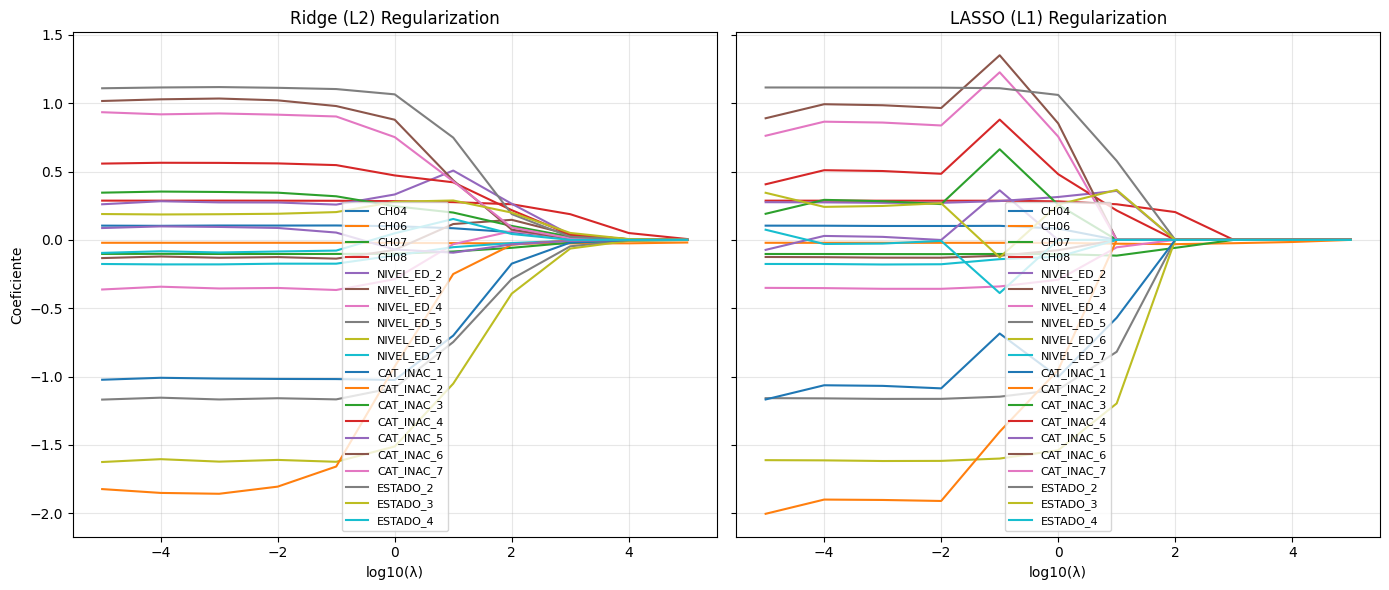

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Panel A - Ridge
for col in coef_ridge.columns:
    axes[0].plot(coef_ridge.index, coef_ridge[col], label=col)
axes[0].set_title("Ridge (L2) Regularization")
axes[0].set_xlabel("log10(λ)")
axes[0].set_ylabel("Coeficiente")
axes[0].legend(loc='best', fontsize=8)
axes[0].grid(alpha=0.3)

# Panel B - LASSO
for col in coef_lasso.columns:
    axes[1].plot(coef_lasso.index, coef_lasso[col], label=col)
axes[1].set_title("LASSO (L1) Regularization")
axes[1].set_xlabel("log10(λ)")
axes[1].legend(loc='best', fontsize=8)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Ejercicio 9: Penalidad optima por Cross-validation y visualización

In [45]:
#Regresión con Ridge (L2 norm)
ridge_cv = LogisticRegressionCV(
    Cs=C_values,          # inversa de lambda
    penalty='l2',
    solver='lbfgs',
    cv=5,                 # 5 particiones (5-fold)
    scoring='accuracy',   # mide desempeño con precisión
    max_iter=10000,
    refit=True
)

ridge_cv.fit(X_train, y_train)

# λ óptimo (recuerda que C = 1/λ)
lambda_ridge_opt = 1 / ridge_cv.C_[0]
print(f"λ óptimo (Ridge): {lambda_ridge_opt:.6f}")

λ óptimo (Ridge): 10.000000


In [46]:
#Regularización con LASSO (L1 norm)
lasso_cv = LogisticRegressionCV(
    Cs=C_values,
    penalty='l1',
    solver='liblinear',   # obligatorio para LASSO
    cv=5,
    scoring='accuracy',
    max_iter=10000,
    refit=True
)

lasso_cv.fit(X_train, y_train)

lambda_lasso_opt = 1 / lasso_cv.C_[0]
print(f"λ óptimo (LASSO): {lambda_lasso_opt:.6f}")

λ óptimo (LASSO): 1.000000


In [47]:
    #Obtener errores de validación y graficar boxplots
# ----- RIDGE -----
ridge_scores = list(ridge_cv.scores_.values())[0]   # matriz (n_samples, n_C)
ridge_errors = 1 - ridge_scores                     # error = 1 - accuracy
ridge_error_df = pd.DataFrame(ridge_errors, columns=lambdas)

# ----- LASSO -----
lasso_scores = list(lasso_cv.scores_.values())[0]
lasso_errors = 1 - lasso_scores
lasso_error_df = pd.DataFrame(lasso_errors, columns=lambdas)

/tmp/ipython-input-3032839739.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = axes[0].boxplot(
/tmp/ipython-input-3032839739.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = axes[1].boxplot(


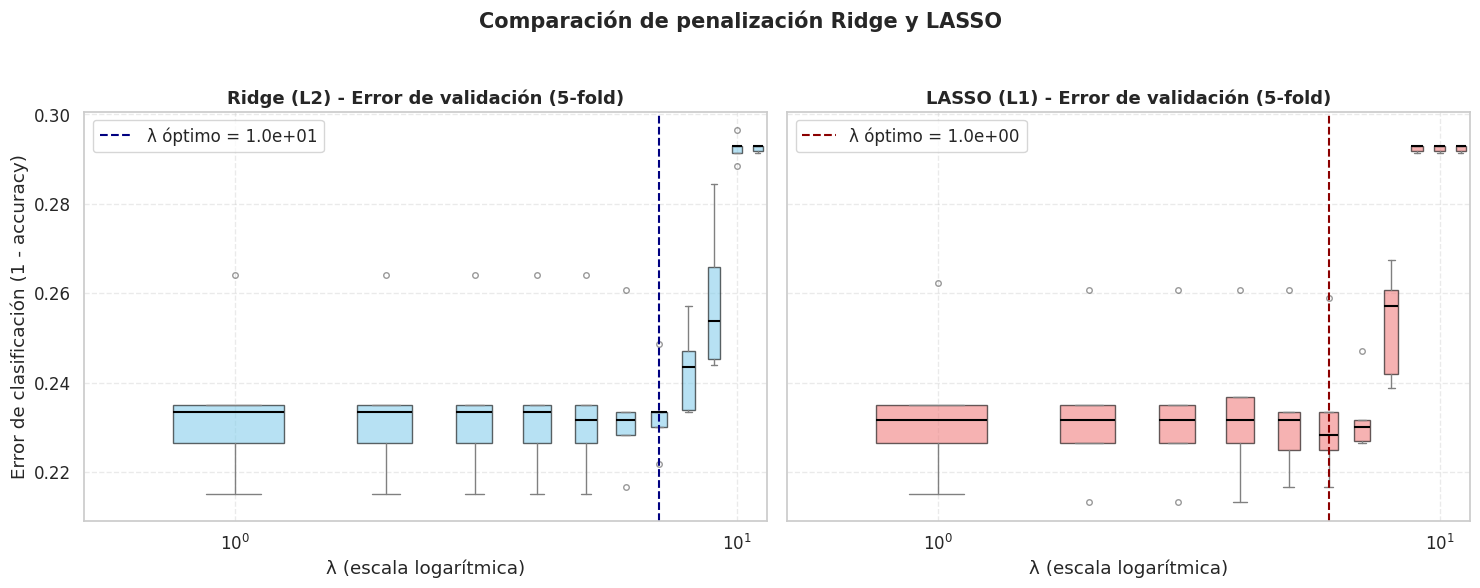

In [48]:
#Estilo general
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Paleta de colores
colors = sns.color_palette("coolwarm", len(lambdas))

# Panel A: Ridge
box1 = axes[0].boxplot(
    ridge_error_df,
    patch_artist=True,
    labels=[f"{l:.0e}" for l in lambdas],
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(facecolor='skyblue', alpha=0.6),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    flierprops=dict(marker='o', markersize=4, color='red', alpha=0.4)
)

axes[0].set_title("Ridge (L2) - Error de validación (5-fold)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("λ (escala logarítmica)")
axes[0].set_ylabel("Error de clasificación (1 - accuracy)")
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.4)

# Línea vertical del λ óptimo
axes[0].axvline(x=np.where(lambdas == 1 / ridge_cv.C_[0])[0][0] + 1,
                color='navy', linestyle='--', linewidth=1.5, label=f"λ óptimo = {1 / ridge_cv.C_[0]:.1e}")
axes[0].legend(loc='upper left')

# Panel B: LASSO
box2 = axes[1].boxplot(
    lasso_error_df,
    patch_artist=True,
    labels=[f"{l:.0e}" for l in lambdas],
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(facecolor='lightcoral', alpha=0.6),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    flierprops=dict(marker='o', markersize=4, color='blue', alpha=0.4)
)

axes[1].set_title("LASSO (L1) - Error de validación (5-fold)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("λ (escala logarítmica)")
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.4)

axes[1].axvline(x=np.where(lambdas == 1 / lasso_cv.C_[0])[0][0] + 1,
                color='darkred', linestyle='--', linewidth=1.5, label=f"λ óptimo = {1 / lasso_cv.C_[0]:.1e}")
axes[1].legend(loc='upper left')

plt.suptitle("Comparación de penalización Ridge y LASSO", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

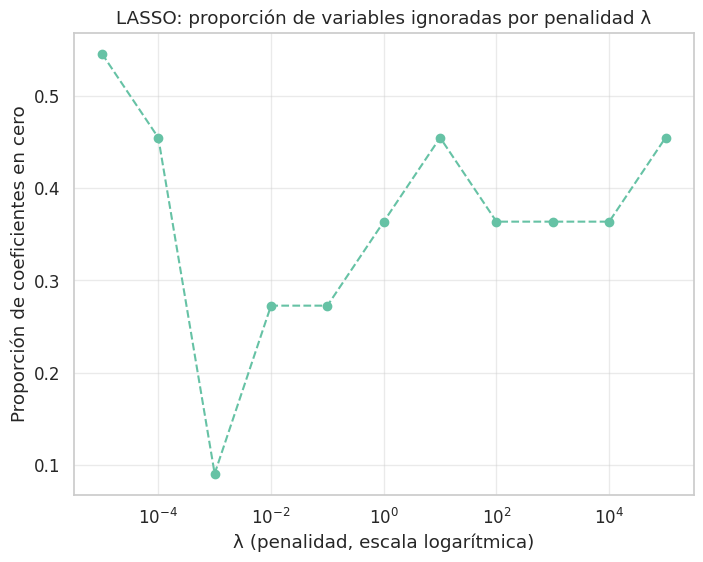

In [ ]:

# Calcular proporción de coeficientes en cero
min_len = min(len(lambda_used), len(prop_zeros))
lambda_used = lambda_used[:min_len]
prop_zeros = prop_zeros[:min_len]


# Graficar
plt.figure(figsize=(8,6))
plt.plot(lambda_used, prop_zeros, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel("λ (penalidad, escala logarítmica)")
plt.ylabel("Proporción de coeficientes en cero")
plt.title("LASSO: proporción de variables ignoradas por penalidad λ")
plt.grid(alpha=0.4)
plt.show()

###Ejercicio 10: Estimación con λ^cv y comparación de coeficientes

In [51]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Decodificamos las variables categoricas almacenadas como numeros para arle una interpretacion correcta

norespondieron1 = pd.read_excel("norespondieron.xlsx")
respondieron1 = pd.read_excel("respondieron.xlsx")

print(respondieron1['NIVEL_ED'].unique())
print(respondieron1['ESTADO'].unique())
print(respondieron1['CAT_INAC'].unique())

print(norespondieron1['NIVEL_ED'].unique())
print(norespondieron1['ESTADO'].unique())
print(norespondieron1['CAT_INAC'].unique())

respondieron1["CH04"] = respondieron1["CH04"].replace({
    1: 0, # Varon
    2: 1 }) # Mujer

norespondieron1["CH04"] = norespondieron1["CH04"].replace({
    1: "Varon",
    2: "Mujer"})


respondieron1["NIVEL_ED"] = respondieron1["NIVEL_ED"].replace({
    1: "Primario incompleto (incluye educación especial)",
    2: "Primario completo",
    3: "Secundario incompleto",
    4: "Secundario completo",
    5: "Superior/universitario incompleto",
    6: "Superior/universitario completo",
    7: "Sin instrucción",
    9: "Ns/Nr"})

norespondieron1["NIVEL_ED"] = norespondieron1["NIVEL_ED"].replace({
    1: "Primario incompleto (incluye educación especial)",
    2: "Primario completo",
    3: "Secundario incompleto",
    4: "Secundario completo",
    5: "Superior/universitario incompleto",
    6: "Superior/universitario completo",
    7: "Sin instrucción",
    9: "Ns/Nr"})

respondieron1["ESTADO"] = respondieron1["ESTADO"].replace({
    0: "Entrevista no realizada",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"})

norespondieron1["ESTADO"] = norespondieron1["ESTADO"].replace({
    0: "Entrevista no realizada",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"})

respondieron1["CAT_INAC"] = respondieron1["CAT_INAC"].replace({
    0: "Individuo Ocupado",
    1: "Jubilado/pensionado",
    2: "Rentista",
    3: "Estudiante",
    4: "Ama de casa",
    5: "Menor de 6 años",
    6: "Discapacitado",
    7: "Otros"})

norespondieron1["CAT_INAC"] = norespondieron1["CAT_INAC"].replace({
    0: "Individuo Ocupado",
    1: "Jubilado/pensionado",
    2: "Rentista",
    3: "Estudiante",
    4: "Ama de casa",
    5: "Menor de 6 años",
    6: "Discapacitado",
    7: "Otros"})

print(respondieron1['NIVEL_ED'].unique())
print(respondieron1['ESTADO'].unique())
print(respondieron['CAT_INAC'].unique())

print(norespondieron1['NIVEL_ED'].unique())
print(norespondieron1['ESTADO'].unique())
print(norespondieron1['CAT_INAC'].unique())

# Obtenemos las variables dummies

respondieron1_dummies = pd.get_dummies(
    respondieron1[['NIVEL_ED', 'ESTADO', 'CAT_INAC']],
    drop_first=True, dtype=int)
norespondieron1_dummies = pd.get_dummies(
    norespondieron1[['NIVEL_ED', 'ESTADO', 'CAT_INAC']],
    drop_first=True, dtype=int)

# Aseguramos que ambos df tengan las mismas columnas, por si algun valor no estaba
respondieron1_dummies, norespondieron1_dummies = respondieron1_dummies.align(norespondieron1_dummies, join='outer', axis=1, fill_value=0)

respondieron1 = pd.concat([respondieron1, respondieron1_dummies], axis=1)
norespondieron1 = pd.concat([norespondieron1, norespondieron1_dummies], axis=1)

[3 2 4 5 6 1 7]
[3 1 2 4 0]
[1 0 4 7 3 5 2 6]
[5 3 1 6 2 4 7]
[2 3 4 1 0]
[0 3 7 4 5 6 1 2]
['Secundario incompleto' 'Primario completo' 'Secundario completo'
 'Superior/universitario incompleto' 'Superior/universitario completo'
 'Primario incompleto (incluye educación especial)' 'Sin instrucción']
['Inactivo' 'Ocupado' 'Desocupado' 'Menor de 10 años'
 'Entrevista no realizada']
[1 0 4 7 3 5 2 6]
['Superior/universitario incompleto' 'Secundario incompleto'
 'Primario incompleto (incluye educación especial)'
 'Superior/universitario completo' 'Primario completo'
 'Secundario completo' 'Sin instrucción']
['Desocupado' 'Inactivo' 'Menor de 10 años' 'Ocupado'
 'Entrevista no realizada']
['Individuo Ocupado' 'Estudiante' 'Otros' 'Ama de casa' 'Menor de 6 años'
 'Discapacitado' 'Jubilado/pensionado' 'Rentista']


In [78]:
# Seleccionamos nuevamente las variables

respondieron1_2025 = respondieron1[respondieron1['ANO4'] == 2025].reset_index(drop=True)
respondieron1_2005 = respondieron1[respondieron1['ANO4'] == 2005].reset_index(drop=True)

norespondieron1_2025 = norespondieron1[norespondieron1['ANO4'] == 2025].reset_index(drop=True)
norespondieron1_2005 = norespondieron1[norespondieron1['ANO4'] == 2005].reset_index(drop=True)


# Creamos nuevamente las variables sin seleccionar los años
variables_X1 = [ 'CH04','CH06','CH07','CH08','NIVEL_ED_Primario incompleto (incluye educación especial)',
       'NIVEL_ED_Secundario completo', 'NIVEL_ED_Secundario incompleto',
       'NIVEL_ED_Sin instrucción', 'NIVEL_ED_Superior/universitario completo',
       'NIVEL_ED_Superior/universitario incompleto',
       'ESTADO_Entrevista no realizada', 'ESTADO_Inactivo',
       'ESTADO_Menor de 10 años', 'ESTADO_Ocupado', 'CAT_INAC_Discapacitado',
       'CAT_INAC_Estudiante', 'CAT_INAC_Individuo Ocupado',
       'CAT_INAC_Jubilado/pensionado', 'CAT_INAC_Menor de 6 años',
       'CAT_INAC_Otros', 'CAT_INAC_Rentista']
variable_y1 = 'pobre'



# Crear X e y
X1 = respondieron1_2025[variables_X1].copy()
y1 = respondieron1_2025[variable_y1]

# Agregar columna de unos para el intercepto
X1.insert(0, 'const', 1)

# Separar en train y test (70%-30%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.3, random_state=444)

# Preparamos los datos
sc = StandardScaler()
X_sc1 = pd.DataFrame(sc.fit_transform(X1),index=X1.index, columns=X1.columns)
X_sc1 = X_sc1.drop(['const'], axis=1)
Xsc_train1, Xsc_test1, ysc_train1, ysc_test1 = train_test_split(X_sc1, y1, test_size=0.3, random_state=444)

# Modelo sin penalidades
logit_sin_pen = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
logit_sin_pen.fit(Xsc_train1, ysc_train1)

# Modelo con penalidad l1 lasso optima
logit_l1 = LogisticRegression(penalty='l1', C=1/lambda_lasso_opt, solver='liblinear', max_iter=1000)
logit_l1.fit(Xsc_train1, ysc_train1)

# Modelo con penalidad l2 ridge optima
logit_l2 = LogisticRegression(penalty='l2', C=1/lambda_ridge_opt, solver='lbfgs', max_iter=1000)
logit_l2.fit(Xsc_train1, ysc_train1)

# Armamos una tabla con los resultados y los exportamos
resultados_tabla = pd.DataFrame({'Variables': Xsc_train1.columns,'Sin penalidad': logit_sin_pen.coef_.flatten(),'L1 (Lasso)': logit_l1.coef_.flatten(),'L2 (Ridge)': logit_l2.coef_.flatten()})
resultados_tabla = resultados_tabla.set_index('Variables').round(4)

resultados_tabla.to_excel("resultados_logit_regularizacion_ej10_tp4.xlsx")

display(resultados_tabla)

,Sin penalidad,L1 (Lasso),L2 (Ridge)
Variables,,,
CH04,0.0526,0.0491,0.0497
CH06,-0.4801,-0.4582,-0.4307
CH07,-0.1701,-0.1650,-0.1563
CH08,0.5442,0.5407,0.5303
NIVEL_ED_Primario incompleto (incluye educación especial),-0.0912,-0.0730,-0.0472
NIVEL_ED_Secundario completo,-0.2551,-0.2301,-0.1927
NIVEL_ED_Secundario incompleto,-0.1642,-0.1405,-0.1041
NIVEL_ED_Sin instrucción,-0.0962,-0.0850,-0.0697
NIVEL_ED_Superior/universitario completo,-0.7009,-0.6762,-0.6262


# E. Desempeño de modelos afuera de la muestra, métricas y politicas públicas

### Ejercicio 11

In [53]:
from sklearn.metrics import confusion_matrix

# Realizamos predicciones con el modelo Ridge en el conjunto de prueba (X_test)
# Se utiliza el objeto 'ridge_cv' del modelo Ridge previamente ajustado.
y_pred_ridge = ridge_cv.predict(X_test)

# Calculamos la matriz de confusion
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)

print(f"Matriz de confusion para el modelo logit con Ridge ( λ optimo = {lambda_ridge_opt:.6f}):")
print(conf_matrix_ridge)

Matriz de confusion para el modelo logit con Ridge ( λ optimo = 10.000000):
[[776  65]
 [245 172]]


In [54]:
from sklearn.metrics import confusion_matrix

# Realizamos las predicciones con el modelo LASSO en el conjunto de prueba (X_test)
# Se utiliza el objeto 'lasso_cv' del modelo LASSO previamente ajustado.
y_pred_lasso = lasso_cv.predict(X_test)

# Calculamos la matriz de confusion
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)

print(f"Matriz de confusion para el modelo Logit con LASSO ( λ optimo= {lambda_lasso_opt:.6f}):")
print(conf_matrix_lasso)

Matriz de confusion para el modelo Logit con LASSO ( λ optimo= 1.000000):
[[771  70]
 [241 176]]


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Entrenamos el modelo KNN con el valor óptimo de K obtenido mediante cv
# usar los datos de entrenamiento que incluyan todas las características utilizadas para el entrenamiento (X_train, y_train).

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# hacemos predicciones en el conjunto de prueba (X_test)
y_pred_knn = knn_optimal.predict(X_test)

# calculamos la matriz de confusion
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"matriz de confusion para el modelo KNN con K optimo ({optimal_k}):")
print(conf_matrix_knn)

matriz de confusion para el modelo KNN con K optimo (10):
[[752  89]
 [228 189]]


In [56]:
from sklearn.metrics import confusion_matrix

# Realizamos predicciones con el modelo Logit en el conjunto de prueba (X_test)
# Se utiliza el objeto 'result' del modelo Logit ajustado previamente
y_pred_proba_logit = result.predict(X_test)

# Conviertimos las probabilidades en predicciones binarias utilizando un umbral de 0,5.
y_pred_logit = (y_pred_proba_logit > 0.5).astype(int)

# Calculamos la matriz de confusion
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)

print("matriz de confusion del modelo logit (umbral > 0.5):")
print(conf_matrix_logit)

matriz de confusion del modelo logit (umbral > 0.5):
[[770  71]
 [241 176]]


In [61]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades previstas para cada modelo
y_pred_proba_logit = result.predict(X_test)
y_pred_proba_knn = knn_optimal.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva
y_pred_proba_lasso = lasso_cv.predict_proba(X_test)[:, 1]
y_pred_proba_ridge = ridge_cv.predict_proba(X_test)[:, 1]


# Calculamos la curva ROC y  AUC para el modelo Logit
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, y_pred_proba_logit)
auc_logit = auc(fpr_logit, tpr_logit)

# Calculamos curva de ROC  y AUC para KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# Calculamos la curva de ROC y AUC para el modelo LASSO
fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test, y_pred_proba_lasso)
auc_lasso = auc(fpr_lasso, tpr_lasso)

# Calculamos la curva de ROC  y AUC para Ridge
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test, y_pred_proba_ridge)
auc_ridge = auc(fpr_ridge, tpr_ridge)

# Print AUC scores
print(f"AUC para Logit : {auc_logit:.4f}")
print(f"AUC para KNN : {auc_knn:.4f}")
print(f"AUC para LASSO : {auc_lasso:.4f}")
print(f"AUC para Ridge : {auc_ridge:.4f}")

AUC para Logit : 0.8018
AUC para KNN : 0.7690
AUC para LASSO : 0.8024
AUC para Ridge : 0.7979


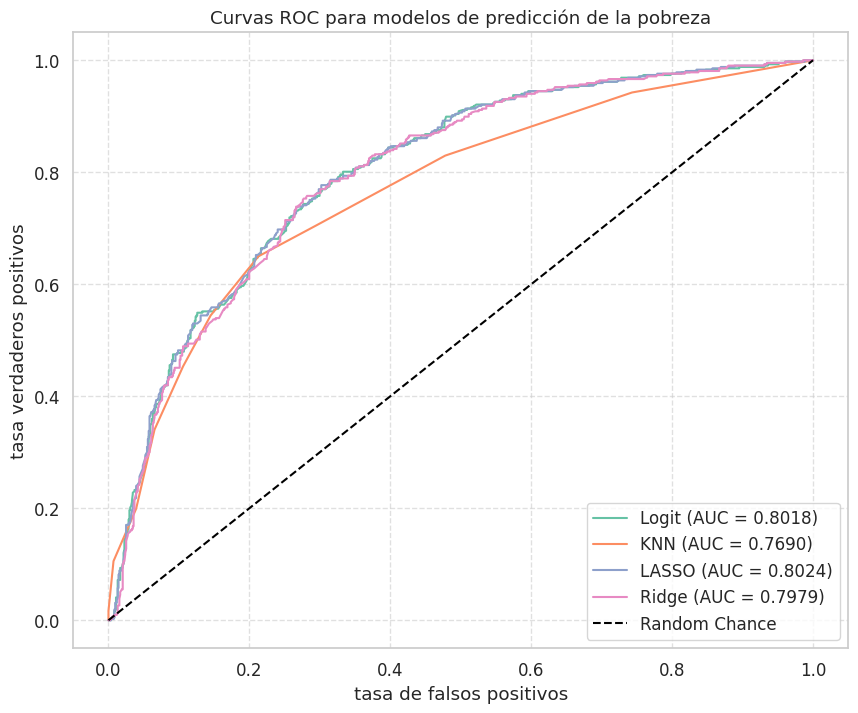

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# graficamos la curva de ROC para Logit
plt.plot(fpr_logit, tpr_logit, label=f'Logit (AUC = {auc_logit:.4f})')

# graficamos la curva de ROC para KNN
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.4f})')

# graficamos la curva de  ROC para LASSO
plt.plot(fpr_lasso, tpr_lasso, label=f'LASSO (AUC = {auc_lasso:.4f})')

# graficamos la curva de ROC para Ridge
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge (AUC = {auc_ridge:.4f})')

# graficamos una diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Set labels and title
plt.xlabel('tasa de falsos positivos')
plt.ylabel('tasa verdaderos positivos')
plt.title('Curvas ROC para modelos de predicción de la pobreza')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [71]:
#calculamos las metricas de clasificacion

from sklearn.metrics import accuracy_score, f1_score

# Calcular la precisión para cada modelo
accuracy_logit = accuracy_score(y_test, y_pred_logit)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

# Calcula la puntuación F1 para cada modelo.
f1_logit = f1_score(y_test, y_pred_logit)
f1_knn = f1_score(y_test, y_pred_knn)
f1_lasso = f1_score(y_test, y_pred_lasso)
f1_ridge = f1_score(y_test, y_pred_ridge)

# visualizamos las metricas
print(f"Logit :")
print(f"  Accuracy: {accuracy_logit:.4f}")
print(f"  F1-Score: {f1_logit:.4f}")
print(f"\nKNN :")
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  F1-Score: {f1_knn:.4f}")
print(f"\nLASSO :")
print(f"  Accuracy: {accuracy_lasso:.4f}")
print(f"  F1-Score: {f1_lasso:.4f}")
print(f"\nRidge :")
print(f"  Accuracy: {accuracy_ridge:.4f}")
print(f"  F1-Score: {f1_ridge:.4f}")

Logit :
  Accuracy: 0.7520
  F1-Score: 0.5301

KNN :
  Accuracy: 0.7480
  F1-Score: 0.5439

LASSO :
  Accuracy: 0.7528
  F1-Score: 0.5309

Ridge :
  Accuracy: 0.7536
  F1-Score: 0.5260


###Ejercicio 13

In [80]:
# Crear X para la base norespondieron_2025
variables_X = ['CH04','CH06','CH07','CH08','NIVEL_ED','CAT_INAC', 'ESTADO']
X_noresp = norespondieron_2025[variables_X].copy()

# Convertimos las variables categóricas a tipo categoricas y luego a dummies
# drop_first=True evita multicolinealidad eliminando la categoría base
X_noresp = pd.get_dummies(X_noresp, columns=['NIVEL_ED','CAT_INAC', 'ESTADO'], drop_first=True)
X_noresp = X_noresp.astype(float)

# Agregar la constante (columna de unos)
X_noresp.insert(0, 'const', 1)

# Alinear columnas entre X_train and X_noresp
X_noresp = X_noresp.reindex(columns=X_train.columns, fill_value=0)

# Predecir probabilidad de ser pobre
noresp_pred_prob = result.predict(X_noresp)

# Definir umbral de decisión
umbral = 0.3  # si queremos priorizar inclusión; usar 0.5 si querés criterio neutro

# Clasificamos según el umbral
noresp_pred_class = (noresp_pred_prob >= umbral).astype(int)

# Calculamos proporción de personas identificadas como pobres
proporcion_pobres = noresp_pred_class.mean()

print(f"Proporción de personas identificadas como pobres: {proporcion_pobres:.2%}")

Proporción de personas identificadas como pobres: 45.06%
